# Exploratory Data Analysis
--> **Sections**:

* Importing libraries and Exploring the Dataset.

* Checking missing values and Outliers.

* Creating visual methods to analyze the data.

* Analyzing trends, patterns, and relationships in the Data.

## Importing libraries and Exploring the Dataset

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.19.5
1.1.5
0.11.1


In [3]:
# Read the Dataset
insurance_df = pd.read_csv('insurance-data.csv')

In [4]:
# Display the first five and last five examples in the dataset

insurance_df.head(-5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733


In [5]:
#Info about the data shape of data, type of individual columns

insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Checking **Missing Values** and **Outliers**

In [6]:
insurance_df.isna().apply(pd.value_counts)

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


In [7]:
# Check for the null values 
insurance_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# As list of columns
insurance_df.columns[insurance_df.isna().any()].tolist()

[]

In [9]:
# Select contains at least one NaN
insurance_df.loc[:, insurance_df.isna().any()].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Empty DataFrame

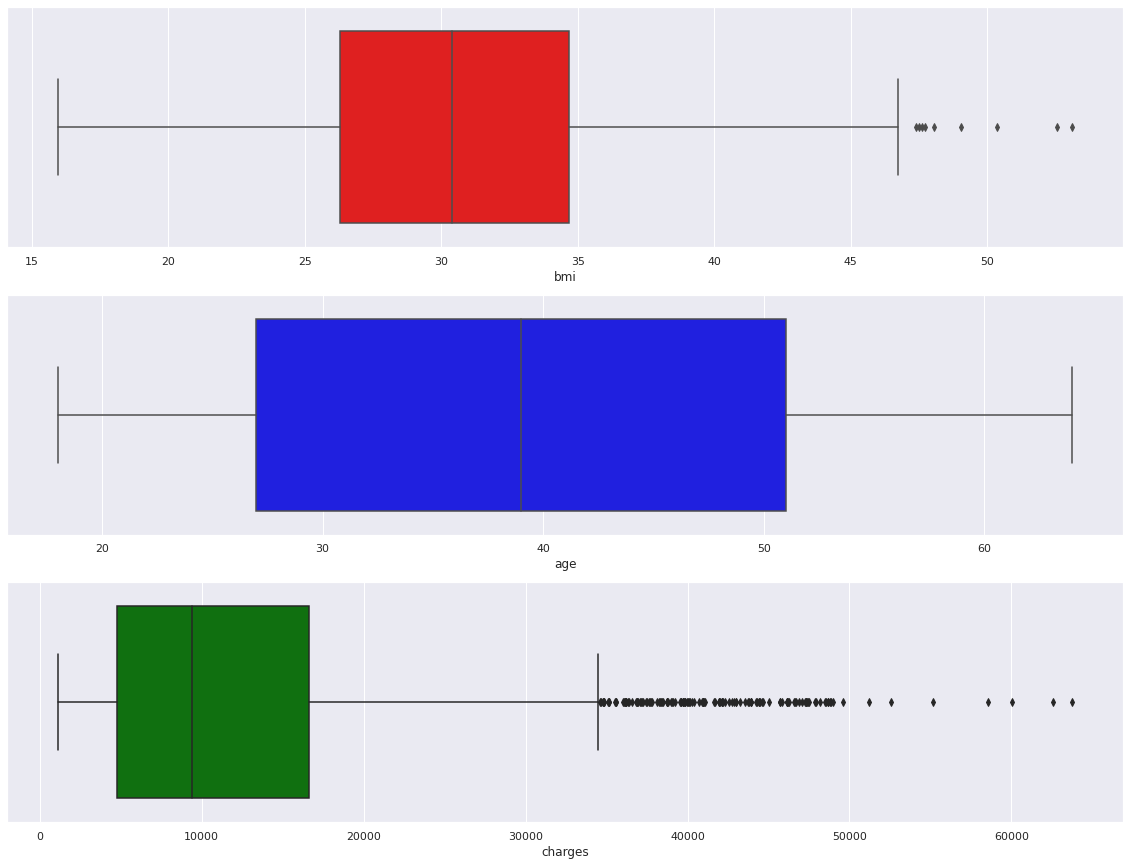

In [10]:
# Checking for the outliers
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x = insurance_df['bmi'], color='red')

plt.subplot(3,1,2)
sns.boxplot(x = insurance_df['age'], color='blue')

plt.subplot(3,1,3)
sns.boxplot(x = insurance_df['charges'], color='green')

plt.show()

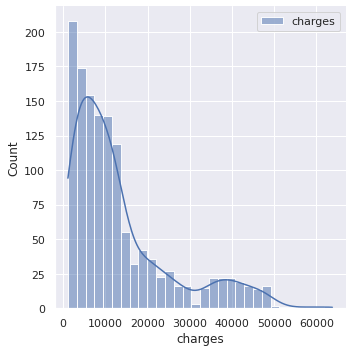

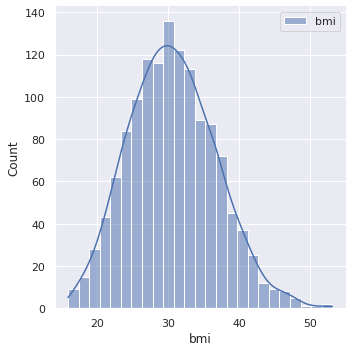

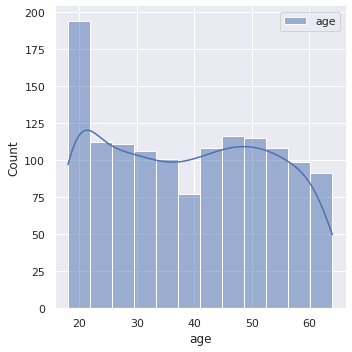

In [11]:
plot_list = ['charges', 'bmi', 'age']

for each in plot_list:
  sns.displot(data = insurance_df, x = each, kde = True, label = str(each))
  plt.legend()
  plt.show()

Conclusion of this analysis:

- bmi has a few extreme values.

- charges as it is highly skewed, there are quiet a lot of extreme values.

In [12]:
# a brief summary for the dataset

insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Conclusion of this analysis:

- All the statistics seem reasonable.

- Age column: data looks representative of the true age distribution of the adult population with (39) mean.

- Children Column: Few people have more than 2 children (75% of the people have 2 or less children).

- The claimed amount is higly skewed as most people would require basic medi-care and only few suffer from diseases which cost more to get rid of.

## Creating visual methods to analyze the data.

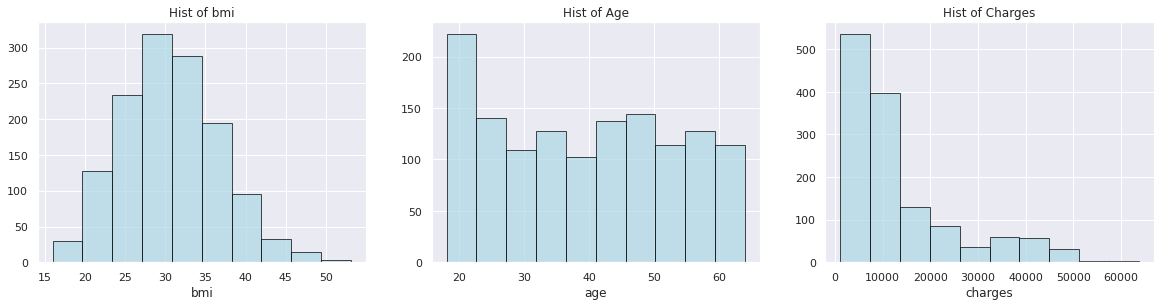

In [13]:
# Plots to see the distribution of the continuous features individually

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(insurance_df.bmi, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('bmi')
plt.title('Hist of bmi')


plt.subplot(3,3,2)
plt.hist(insurance_df.age, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')
plt.title('Hist of Age')


plt.subplot(3,3,3)
plt.hist(insurance_df.charges, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('charges')
plt.title('Hist of Charges')

plt.show()

Conclusion of this analysis:

- bmi looks normally distributed.

- Age looks uniformly distributed. Only exception seems age = 20.

- As seen in the previous step, charges are highly skewed to right.


In [14]:
# showing the skewness of variables
skewness_list = [stats.skew(insurance_df.bmi), stats.skew(insurance_df.age), stats.skew(insurance_df.charges)]
skewness = pd.DataFrame({'skewness' : skewness_list},
                        index = ['bmi', 'age', 'charges'])
skewness

,skewness
bmi,0.283729
age,0.055610
charges,1.514180


Conclusion of this analysis:

- Skewness of bmi is very low as seen in the previous step

- age is uniformly distributed and thus not skewed

- charges are highly skewed

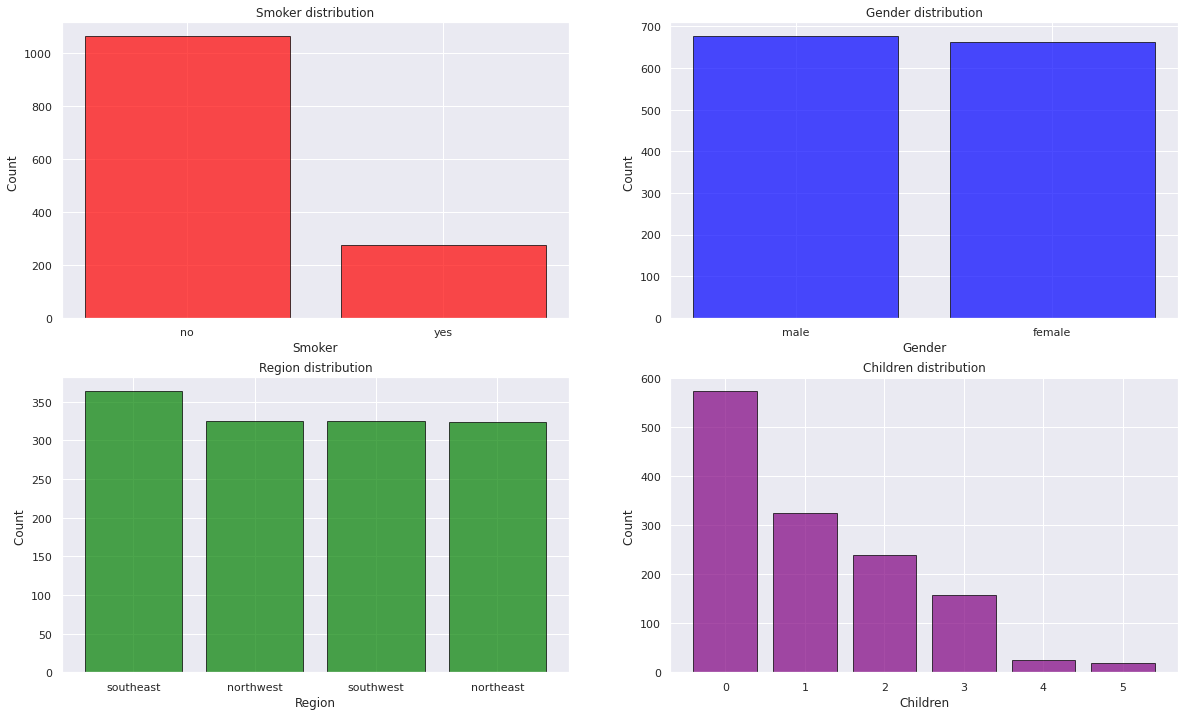

In [15]:
# visualizing data to make analysis

plt.figure(figsize=(20,25))

################################################################################
x = insurance_df.smoker.value_counts().index
y = [insurance_df['smoker'].value_counts()[i] for i in x]

plt.subplot(4,2,1)
plt.bar(x,y, align='center',color = 'red',edgecolor = 'black',alpha = 0.7)  # plot a bar chart
plt.xlabel('Smoker')
plt.ylabel('Count ')
plt.title('Smoker distribution')

################################################################################
x1 = insurance_df.sex.value_counts().index
y1 = [insurance_df['sex'].value_counts()[j] for j in x1]

plt.subplot(4,2,2)
plt.bar(x1,y1, align='center',color = 'blue',edgecolor = 'black',alpha = 0.7)  # plot a bar chart
plt.xlabel('Gender')
plt.ylabel('Count ')
plt.title('Gender distribution')

################################################################################
x2 = insurance_df.region.value_counts().index
y2 = [insurance_df['region'].value_counts()[k] for k in x2]
plt.subplot(4,2,3)
plt.bar(x2,y2, align='center',color = 'green',edgecolor = 'black',alpha = 0.7)  # plot a bar chart
plt.xlabel('Region')
plt.ylabel('Count ')
plt.title('Region distribution')
################################################################################

x3 = insurance_df.children.value_counts().index
y3 = [insurance_df['children'].value_counts()[l] for l in x3]
plt.subplot(4,2,4)
plt.bar(x3,y3, align='center',color = 'purple',edgecolor = 'black',alpha = 0.7)  # plot a bar chart
plt.xlabel('Children')
plt.ylabel('Count ')
plt.title('Children distribution')

plt.show()

Conclusion of this analysis:

- There are lot more non-smokers than smokers.

- Instances are distributed evenly accross all regions.

- Gender is also distributed evenly.

- Most instances have less than 3 children and very few have 4 or 5 children.

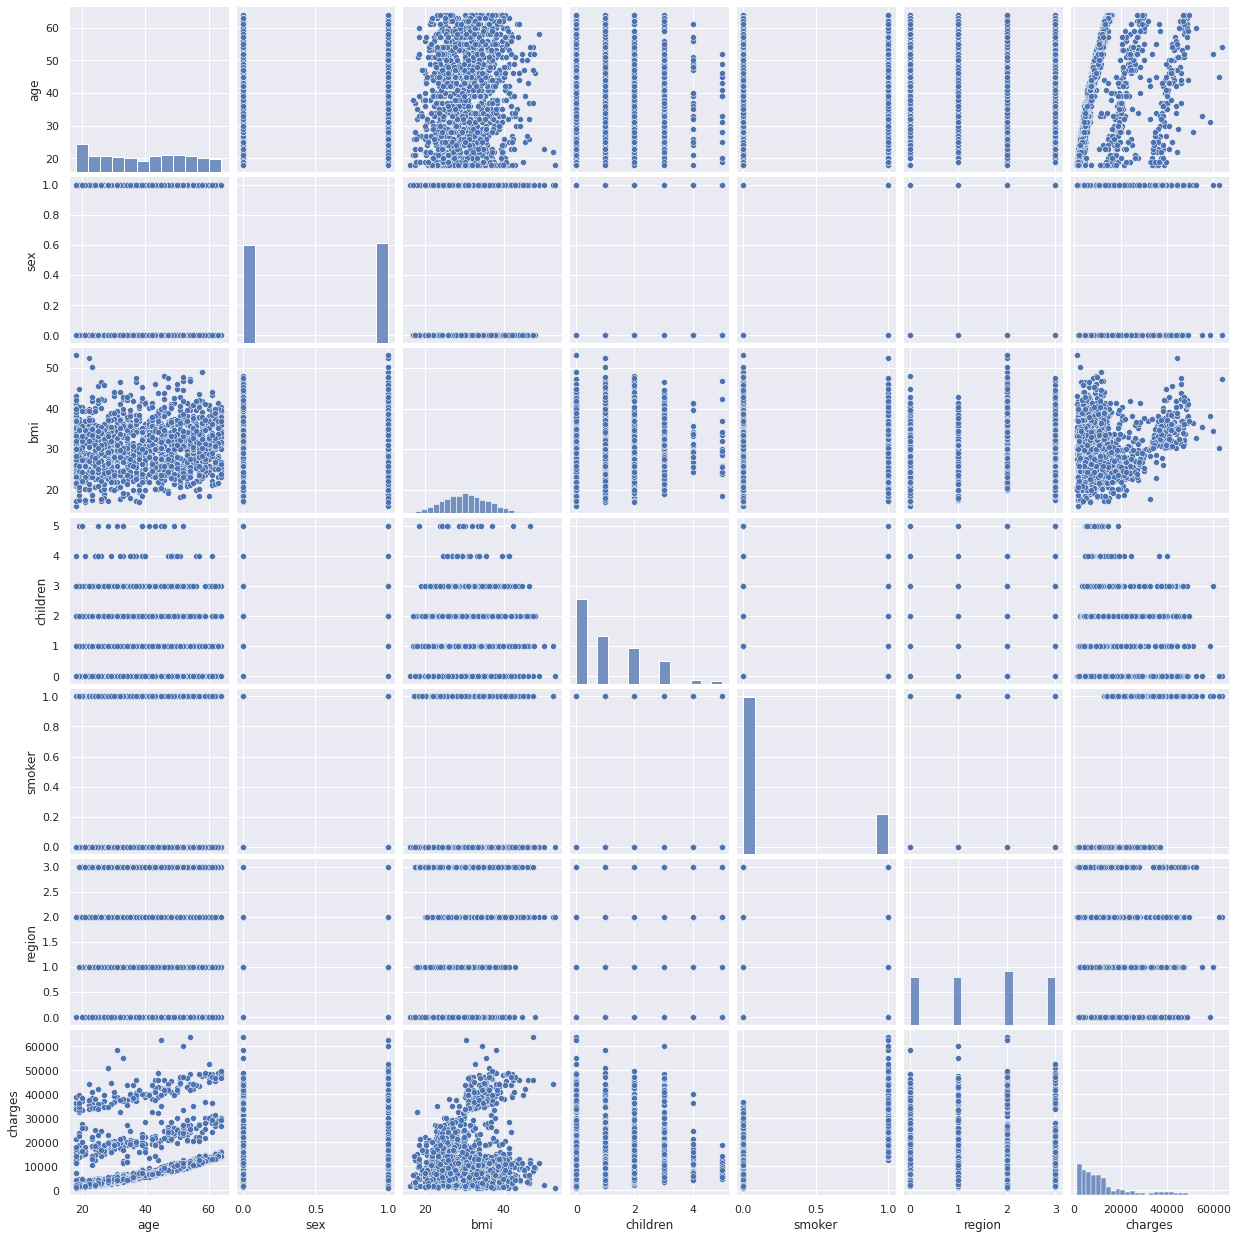

In [16]:
insurance_df_encoded = copy.deepcopy(insurance_df) # pairplot ignores strings
insurance_df_encoded.loc[:,['sex', 'smoker', 'region']] = insurance_df_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 

sns.pairplot(insurance_df_encoded)  # pairplot
plt.show()

Output should include this Analysis:

- There is an obvious correlation between 'charges' and 'smoker'

- Looks like smokers claimed more money than non-smokers

- There's an interesting pattern between 'age' and 'charges'. Notice that older people are charged more than the younger ones

## Analyzing trends, patterns, and relationships in the dataframe

In [17]:
print("Smoker value counts : No / Yes")
insurance_df.smoker.value_counts()

Smoker value counts : No / Yes


no     1064
yes     274
Name: smoker, dtype: int64

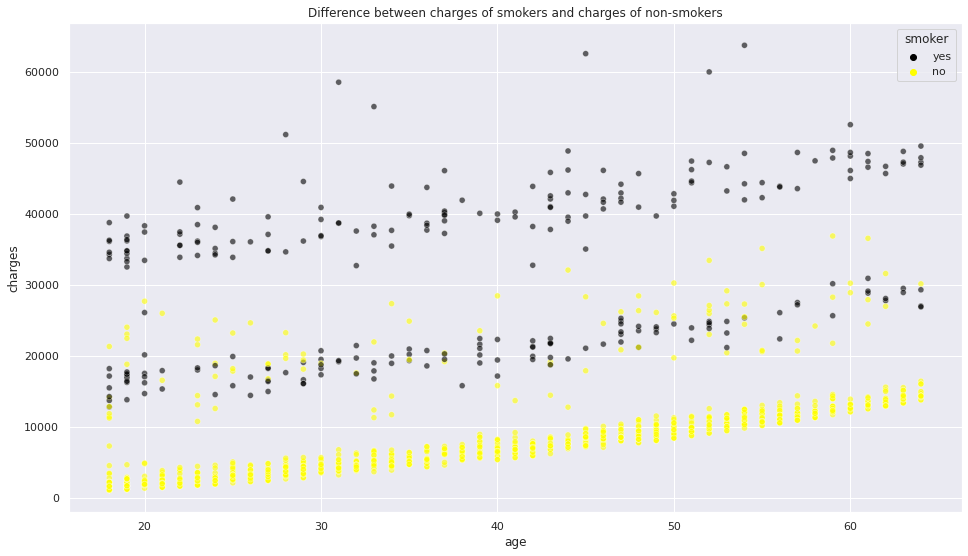

In [18]:
# Scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages
plt.figure(figsize=(16,9))
sns.scatterplot(data = insurance_df, x = 'age', y = 'charges', hue='smoker',
                palette= ['black','yellow'] ,alpha=0.6)
plt.title("Difference between charges of smokers and charges of non-smokers")
plt.show()

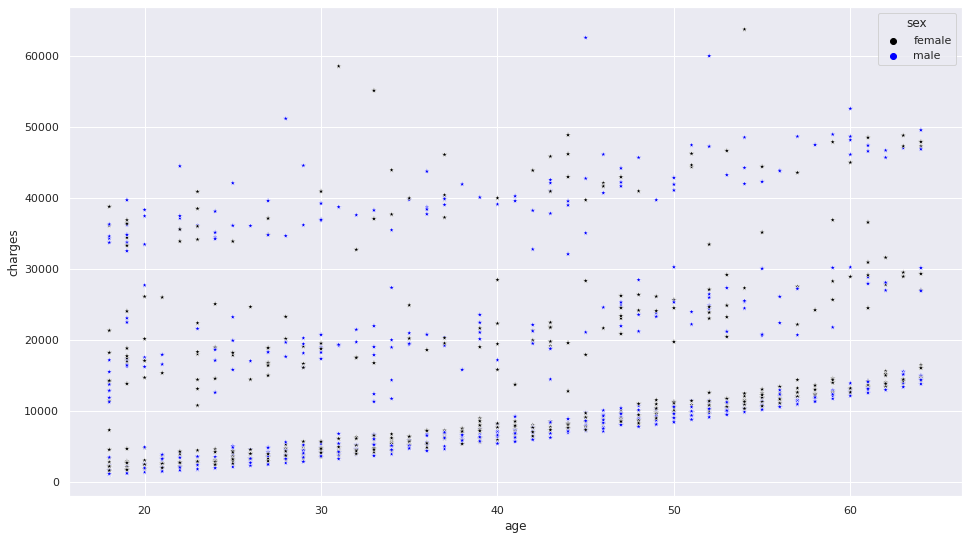

In [19]:
plt.figure(figsize=(16,9))
sns.scatterplot(data = insurance_df, x = 'age', y = 'charges', hue='sex', palette= ['black','blue'], marker = '*' )
plt.show()

There is no apparent relation between gender and charges

--------------------------------------------------------------------------------

In [20]:
# T-test to check dependency of smoking on charges
Ho = "Charges of smoker and non-smoker are same"   # Null Hypothesis
Ha = "Charges of smoker and non-smoker are not the same"   # Alternate Hypothesis

x = np.array(insurance_df[insurance_df['smoker'] == 'yes'].charges)  
y = np.array(insurance_df[insurance_df['smoker'] == 'no'].charges) 

t, p_value  = stats.ttest_ind(x,y, axis = 0) # t-test

if p_value < 0.05:  # significance level = 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Charges of smoker and non-smoker are not the same as the p_value (8.271435842177219e-283) < 0.05


Thus, smokers seem to claim significantly more money than non-smokers

--------------------------------------------------------------------------------

In [21]:
print ("Distribution of Male & Female")
insurance_df.sex.value_counts()

Distribution of Male & Female


male      676
female    662
Name: sex, dtype: int64

In [22]:
# t-test to check dependency of bmi on gender
Ho = "Gender has no effect on bmi"   # Null Hypothesis
Ha = "Gender has an effect on bmi"   # Alternate Hypothesis

x = np.array(insurance_df[insurance_df['sex'] == 'male'].bmi)  
y = np.array(insurance_df[insurance_df['sex'] == 'female'].bmi)

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # significance level = 5%
    print(f'{Ha} as the p_value ({p_value.round()}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Gender has no effect on bmi as the p_value (0.09) > 0.05


bmi of both of the genders are identical


--------------------------------------------------------------------------------

In [23]:
# chi_square test to check if smoking habits are different for different genders

Ho = "Gender has no effect on smoking habits"   # Null Hypothesis
Ha = "Gender has an effect on smoking habits"   # Alternate Hypothesis

crosstab = pd.crosstab(insurance_df['sex'],insurance_df['smoker'])  

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # significance level = 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Gender has an effect on smoking habits as the p_value (0.007) < 0.05


smoker,no,yes
sex,,
female,547,115
male,517,159


Proportion of smokers in males is significantly different from that of the females



--------------------------------------------------------------------------------

In [24]:
# chi_square test to check if smoking habits are different for people of different regions
Ho = "Region has no effect on smoking habits"   # Null Hypothesis
Ha = "Region has an effect on smoking habits"  # Alternate Hypothesis

crosstab = pd.crosstab(insurance_df['smoker'], insurance_df['region'])  

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # significance level = 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Region has no effect on smoking habits as the p_value (0.062) > 0.05


region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


* Smoking habbits of people from different regions seem similar


--------------------------------------------------------------------------------

In [25]:
# Test to see if the distributions of bmi values for females having different number of children, are significantly different

Ho = "No. of children has no effect on bmi"   # Null Hypothesis
Ha = "No. of children has an effect on bmi"    # Alternate Hypothesis


female_df = copy.deepcopy(insurance_df[insurance_df['sex'] == 'female'])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  # significance level = 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

No. of children has no effect on bmi as the p_value (0.716) > 0.05
